In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# dimensions des images
height = 72
width = 128

# Fonctions d'affichage des images
def display_image(video, image_position):
    try:
        img = video[video.position == image_position]
        url = img.index.values[0]
        img = img.values[0]
    except IndexError:
        raise Exception("La position demandée n'est pas disponible")
    img = img[1:] # On supprime la première colonne qui correspond à la position de l'image (en secondes)
    
    display_with_pylab(img, url)
    
def display_compressed_image(pca, std_scaler, X_projected, image_position, list_of_positions):
    try:
        i = np.where(list_of_positions == image_position)[0][0]
    except IndexError:
        raise Exception("La position demandée n'est pas disponible")
        
    compressed_img = X_projected[i]
    img = decompress_image(pca, std_scaler, compressed_img)
    url = list_of_positions.index[i]
    
    display_with_pylab(img, url)

def display_with_pylab(img, url=None):
    img = img.reshape(height, width, 3) # On remet l'image sous forme d'un numpy array de height*width*3
    img = img * 4 # On remet l'échelle des couleurs de 0 à 256
    img = np.array(img, dtype=np.float64)
    if url:
        print(url)
    fig = pylab.figure()
    pylab.imshow(img.astype(np.uint8))
    plt.show()   
    
def decompress_image(pca, std_scaler, compressed_img):
    img = pca.inverse_transform(compressed_img)
    img = std_scaler.inverse_transform(img)
    return img

https://youtu.be/uV5hmpzmWsU?t=150s


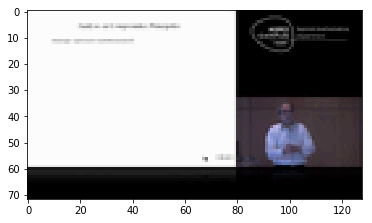

                                      position   0   1   2   3   4   5   6  \
https://youtu.be/uV5hmpzmWsU?t=0s            0   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=3s            3   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=6s            6   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=9s            9   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=12s          12   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=15s          15   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=18s          18   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=21s          21   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=24s          24   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=27s          27   0   0   0   0   0   0   0   
https://youtu.be/uV5hmpzmWsU?t=30s          30  62  62  62  63  63  63  63   
https://youtu.be/uV5hmpzmWsU?t=33s          33  62  62  62  63  

In [2]:
# Chargement de la vidéo (peut prendre quelques secondes)
try:
    video
except NameError:
    video = pd.read_csv("video.csv", index_col= 0)
    
display_image(video,150)
print(video)

X = video.values[:,1:] # On supprime la première colonne qui correspond à la position de l'image (en secondes)

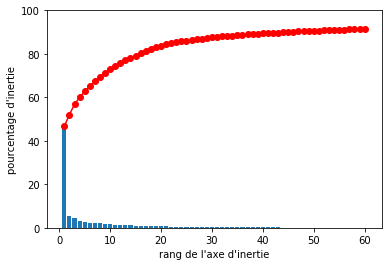

In [3]:
n_comp = 60

# centrage-réduction
X = X.astype(np.float64) # conversion des nombres entiers en nombres décimaux (float) : necessaire pour le StandardScaler
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X) #ligne à rendre numéro 1

# Calcul des composantes principales 
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X_scaled) #ligne à rendre numéro 2
X_projected = pca.transform(X_scaled)

# Affichage des éboulis
eboulis = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(eboulis))+1, eboulis)
plt.plot(np.arange(len(eboulis))+1, eboulis.cumsum(),c="red",marker='o')
plt.ylim(0,100)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.show()

In [4]:
X_scaled

X_projected

array([[ 1.29996580e+03, -5.68593835e+01, -8.80876428e+01, ...,
         8.33021373e+00, -1.04886339e+01, -4.76266900e+00],
       [ 1.29909750e+03, -5.92902205e+01, -8.73996219e+01, ...,
         2.28333197e+00, -4.00989909e+00, -3.61328202e+00],
       [ 1.29809902e+03, -2.67047000e+01, -9.30621679e+01, ...,
        -2.42551464e+00,  1.82153750e+00,  1.15188701e+00],
       ...,
       [ 7.26364409e+02,  6.17107885e+01,  2.47646740e+02, ...,
        -3.93882301e+00,  1.89116318e+00, -1.23616007e+00],
       [ 7.26806930e+02,  5.58827522e+01,  2.42830006e+02, ...,
         1.74806719e+00, -3.77435238e+00,  4.20933435e+00],
       [ 7.27352173e+02,  5.69055671e+01,  2.44923867e+02, ...,
        -2.24435644e+00,  7.89083015e-01, -3.94534906e+00]])

https://youtu.be/uV5hmpzmWsU?t=150s


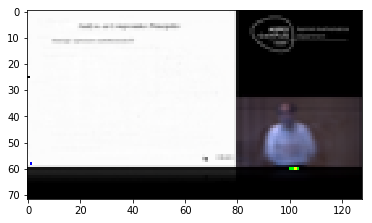

In [5]:
display_compressed_image(pca, std_scaler, X_projected, 150, video["position"])


In [ ]:
# Affichage des 5 premiers plans factoriels
for d1,d2 in [(0,1),(2,3),(4,5),(6,7),(8,9)]:
    if d2 < n_comp:
        fig = plt.figure(figsize=(10,10))
        plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha= 0.5)
        
        # On identifie les images par leur position dans la vidéo (en secondes)
        for i in range(len(X_projected)):
            plt.text(X_projected[i, d1], X_projected[i, d2], video["position"][i], alpha= 0.4)

        # nom des axes
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
        plt.show()

In [ ]:
km = KMeans(n_clusters= 300)
km.fit(X_projected) #ligne à rendre numéro 3
clusters_kmeans = km.labels_
centroids_after_kmeans = km.cluster_centers_
print(centroids_after_kmeans.shape) # 300 centres de n_comp dimensions

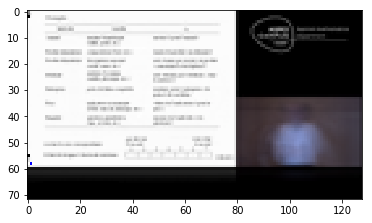

In [12]:
img = decompress_image(pca, std_scaler, centroids_after_kmeans[3]) # On choisit au hasard le cluster numéro 4
display_with_pylab(img)

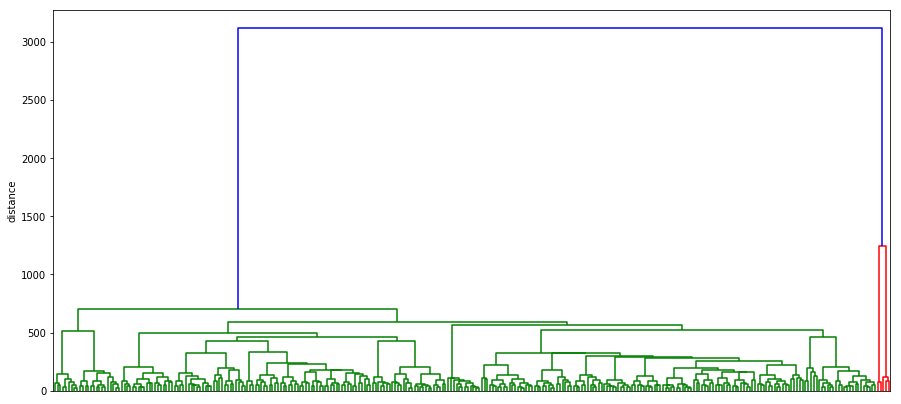

[30 39  1 20  6  3 26 40 38 31 24  5 27 19 18  6 23 29 22 25 17 28 10  1
 36  7 14 16 32 15 16 11  2 26 12  3 25 13 28  8  4 30 27 19 32 11  9 22
 19  6 26 36  5 34 23 17 12  6 38 38  1 37 25  4 20 22  5 28 16 33 20 20
 18  6 25  5 32 23  3 31  3 29 32  1 22 36  6 12 24 20 24 26 38 17 27 13
 11  6  6  5 27 23  7 19 27 19 38 29 22 40  5  3  3  8 31 30 20 22  7 20
 23 38 20 23 15 39 31 38 32 18 20 12 25 25 13 35 16 16 30 20  2 19 26 36
  1  3 14 22 33 19 15  5 16 16 32 27 19 15 26 38 36 12  5 19 29 30 31  6
 38 22 28 24 35 32  1  6 19 18 25 12 25 17 16 28  7 32 37 28 11  8 17  2
 27  4 31  9 11 18 31 18 22 19 22 32 28 31 33  5 32 29  5 14 38 33 29  3
 37 22  6 28 13 12 14 35  1 27  9 26 24 16 15 30 22  6 11  1 32 16 27 19
 25 28 32 21 22  9 24  1 28 20  3 25 31 34 26 10 21  6  5 38  3 16 26 17
  3 17 22  5 23 18 26  5 38 28  8  6 36 10 20 21  5 29 11 23 11 25 22 40
 27 11 29  5 18 27 15  2  4 14 33 22]


In [13]:
Z = linkage(centroids_after_kmeans, 'ward')

plt.figure(figsize=(15, 7))
plt.ylabel('distance')
dendrogram(Z, no_labels=True)
plt.show()

final_clusters = fcluster(Z, 40, criterion="maxclust") #ligne à rendre numéro 3
print(final_clusters)

------------------------------ 
Slide n°  1
Première image :
https://youtu.be/uV5hmpzmWsU?t=2793s


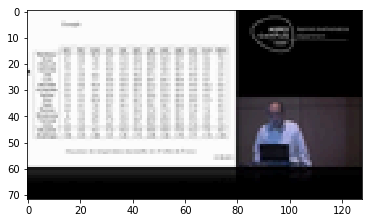

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :71)


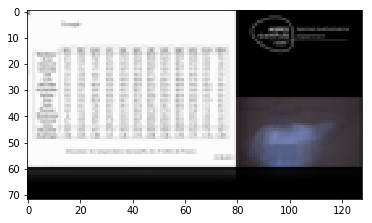

------------------------------ 
Slide n°  2
Première image :
https://youtu.be/uV5hmpzmWsU?t=3912s


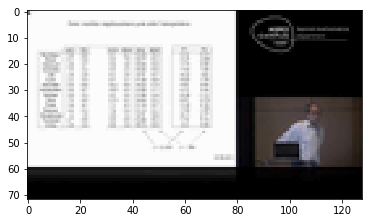

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :18)


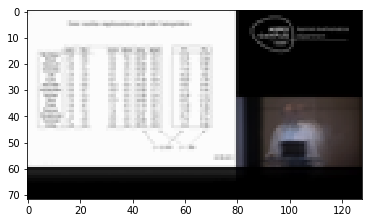

------------------------------ 
Slide n°  3
Première image :
https://youtu.be/uV5hmpzmWsU?t=3915s


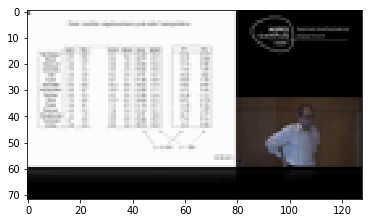

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :81)


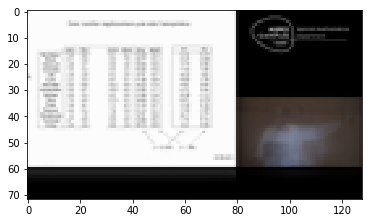

------------------------------ 
Slide n°  4
Première image :
https://youtu.be/uV5hmpzmWsU?t=5412s


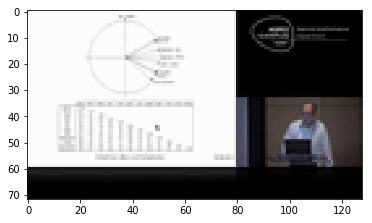

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :23)


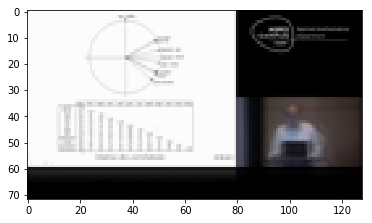

------------------------------ 
Slide n°  5
Première image :
https://youtu.be/uV5hmpzmWsU?t=5421s


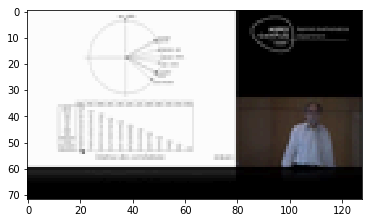

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :103)


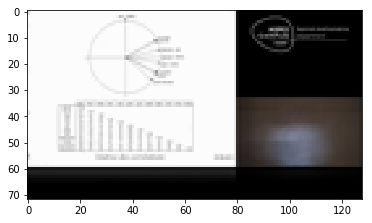

------------------------------ 
Slide n°  6
Première image :
https://youtu.be/uV5hmpzmWsU?t=4308s


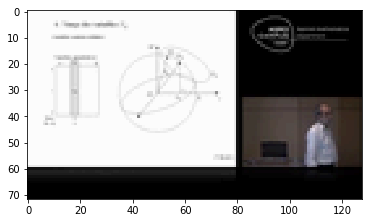

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :92)


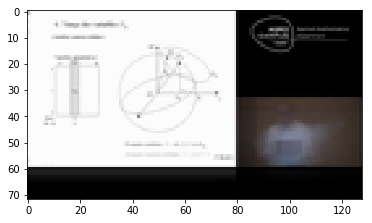

------------------------------ 
Slide n°  7
Première image :
https://youtu.be/uV5hmpzmWsU?t=1134s


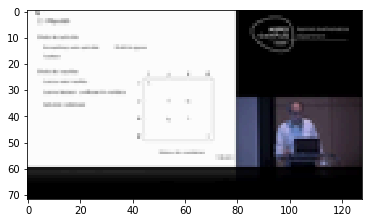

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :12)


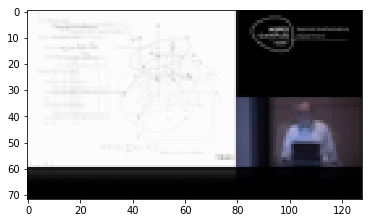

------------------------------ 
Slide n°  8
Première image :
https://youtu.be/uV5hmpzmWsU?t=4314s


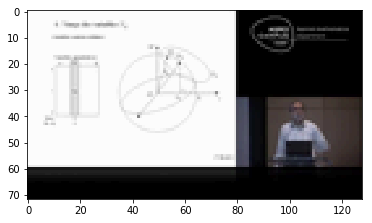

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :31)


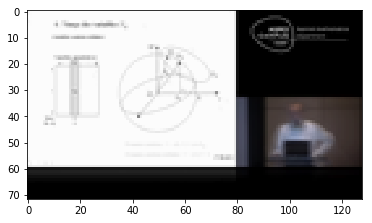

------------------------------ 
Slide n°  9
Première image :
https://youtu.be/uV5hmpzmWsU?t=1569s


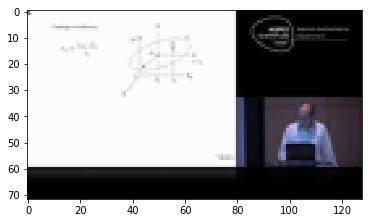

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :8)


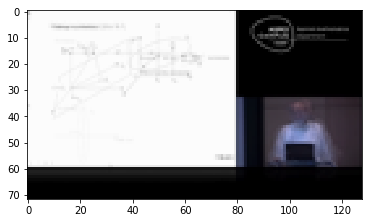

------------------------------ 
Slide n°  10
Première image :
https://youtu.be/uV5hmpzmWsU?t=30s


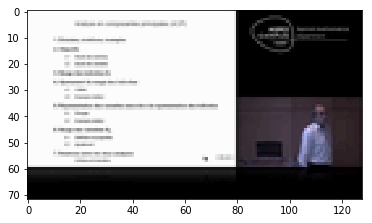

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :7)


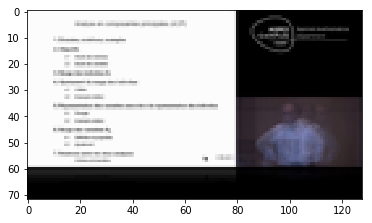

------------------------------ 
Slide n°  11
Première image :
https://youtu.be/uV5hmpzmWsU?t=1701s


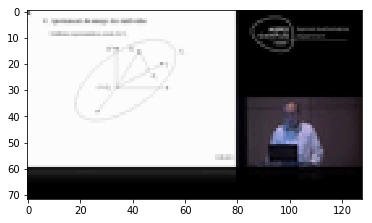

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :46)


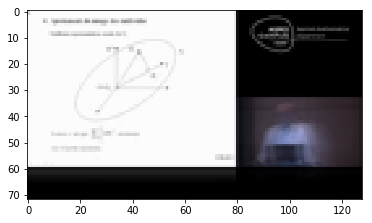

------------------------------ 
Slide n°  12
Première image :
https://youtu.be/uV5hmpzmWsU?t=3453s


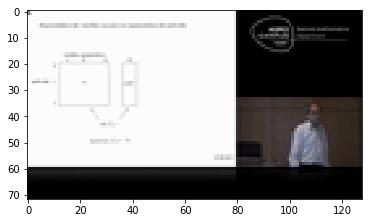

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :38)


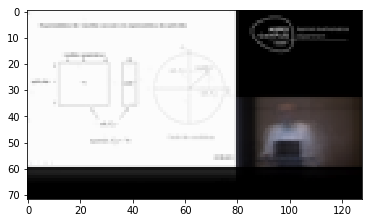

------------------------------ 
Slide n°  13
Première image :
https://youtu.be/uV5hmpzmWsU?t=1518s


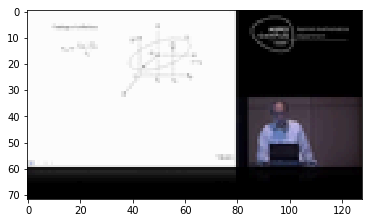

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :25)


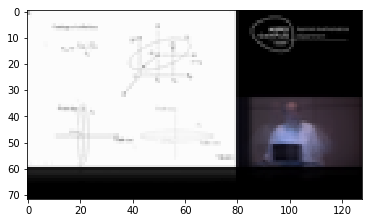

------------------------------ 
Slide n°  14
Première image :
https://youtu.be/uV5hmpzmWsU?t=2136s


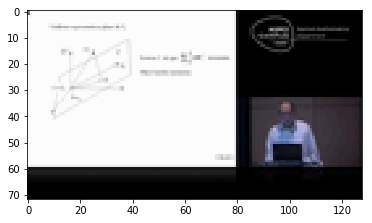

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :24)


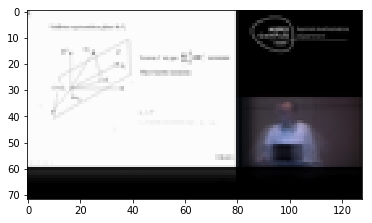

------------------------------ 
Slide n°  15
Première image :
https://youtu.be/uV5hmpzmWsU?t=1176s


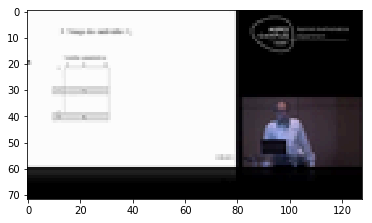

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :25)


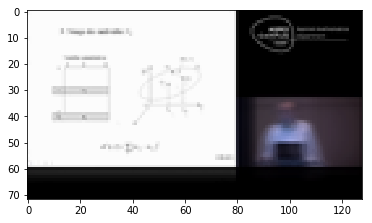

------------------------------ 
Slide n°  16
Première image :
https://youtu.be/uV5hmpzmWsU?t=312s


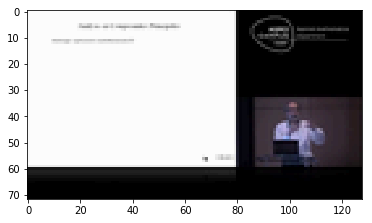

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :59)


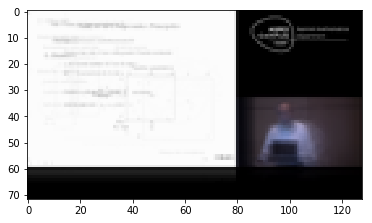

------------------------------ 
Slide n°  17
Première image :
https://youtu.be/uV5hmpzmWsU?t=3363s


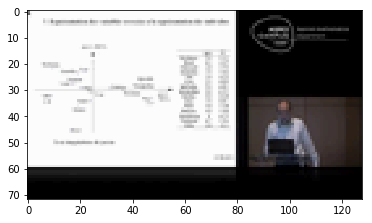

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :29)


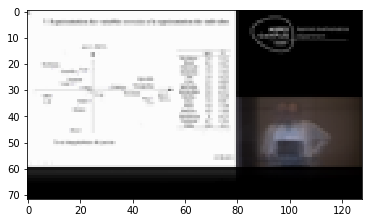

------------------------------ 
Slide n°  18
Première image :
https://youtu.be/uV5hmpzmWsU?t=4683s


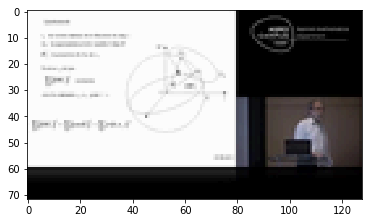

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :52)


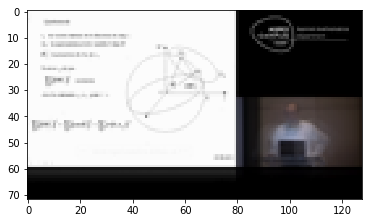

------------------------------ 
Slide n°  19
Première image :
https://youtu.be/uV5hmpzmWsU?t=4686s


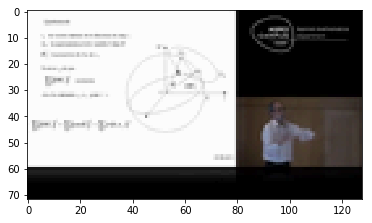

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :118)


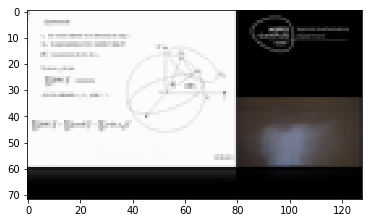

------------------------------ 
Slide n°  20
Première image :
https://youtu.be/uV5hmpzmWsU?t=393s


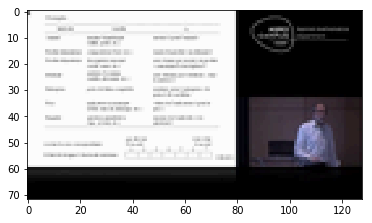

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :103)


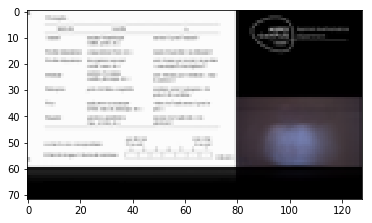

------------------------------ 
Slide n°  21
Première image :
https://youtu.be/uV5hmpzmWsU?t=1206s


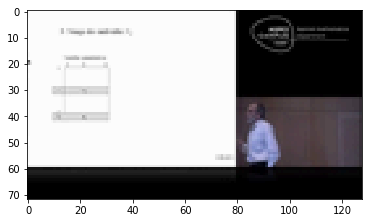

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :4)


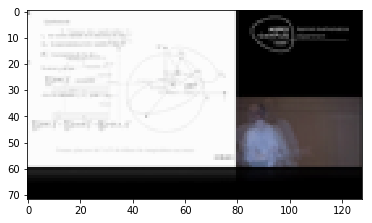

------------------------------ 
Slide n°  22
Première image :
https://youtu.be/uV5hmpzmWsU?t=1707s


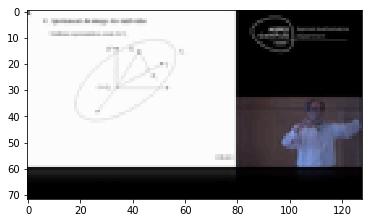

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :95)


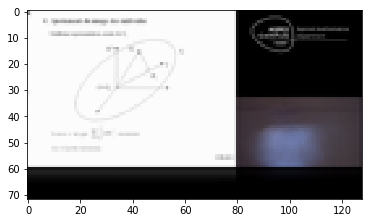

------------------------------ 
Slide n°  23
Première image :
https://youtu.be/uV5hmpzmWsU?t=3009s


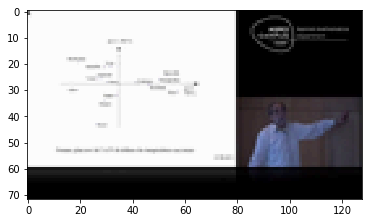

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :93)


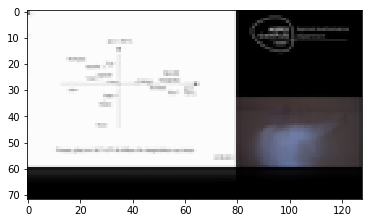

------------------------------ 
Slide n°  24
Première image :
https://youtu.be/uV5hmpzmWsU?t=3006s


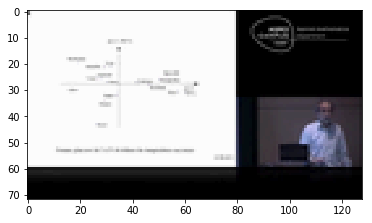

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :25)


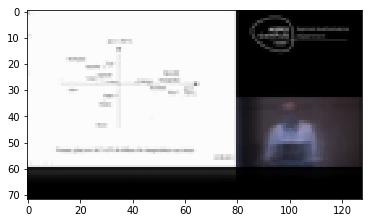

------------------------------ 
Slide n°  25
Première image :
https://youtu.be/uV5hmpzmWsU?t=2478s


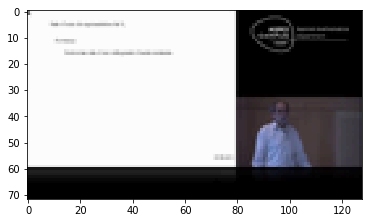

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :76)


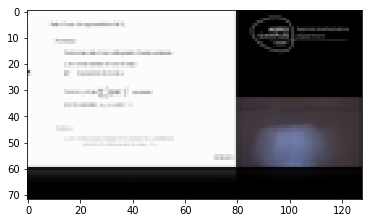

------------------------------ 
Slide n°  26
Première image :
https://youtu.be/uV5hmpzmWsU?t=897s


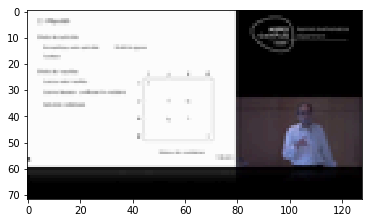

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :83)


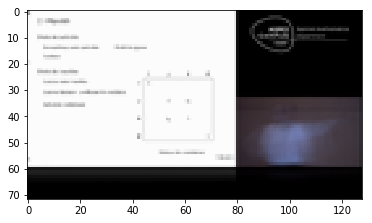

------------------------------ 
Slide n°  27
Première image :
https://youtu.be/uV5hmpzmWsU?t=1179s


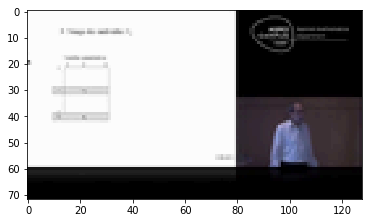

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :84)


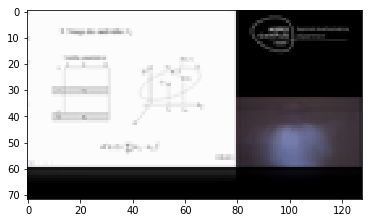

------------------------------ 
Slide n°  28
Première image :
https://youtu.be/uV5hmpzmWsU?t=51s


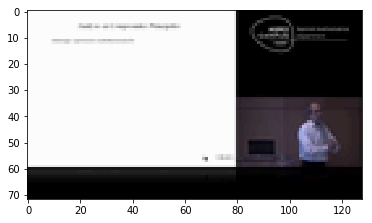

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :90)


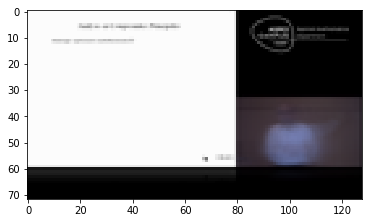

------------------------------ 
Slide n°  29
Première image :
https://youtu.be/uV5hmpzmWsU?t=1521s


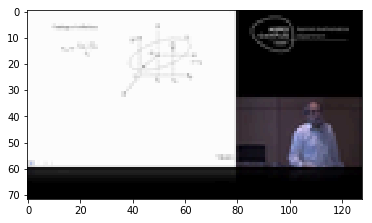

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :37)


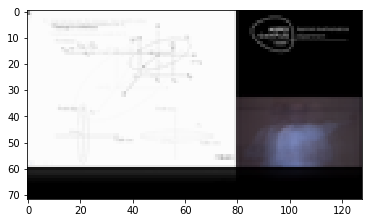

------------------------------ 
Slide n°  30
Première image :
https://youtu.be/uV5hmpzmWsU?t=3450s


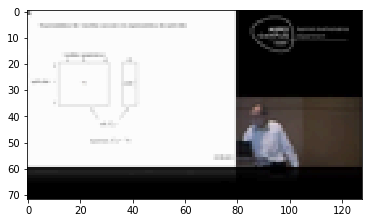

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :39)


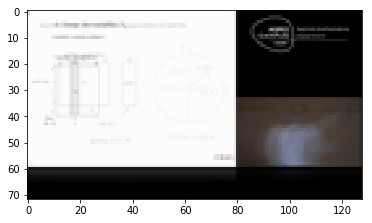

------------------------------ 
Slide n°  31
Première image :
https://youtu.be/uV5hmpzmWsU?t=708s


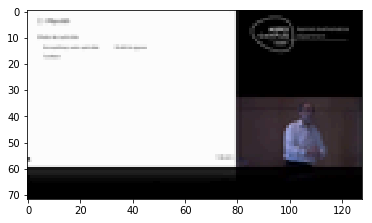

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :64)


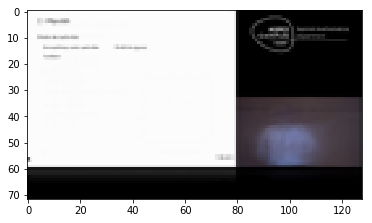

------------------------------ 
Slide n°  32
Première image :
https://youtu.be/uV5hmpzmWsU?t=2139s


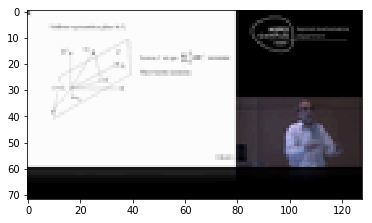

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :82)


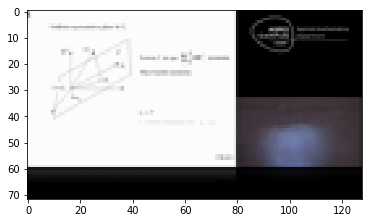

------------------------------ 
Slide n°  33
Première image :
https://youtu.be/uV5hmpzmWsU?t=1407s


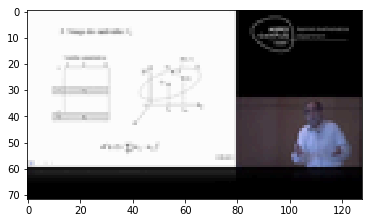

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :9)


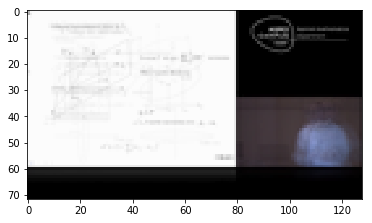

------------------------------ 
Slide n°  34
Première image :
https://youtu.be/uV5hmpzmWsU?t=5400s


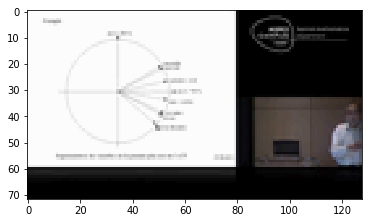

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :2)


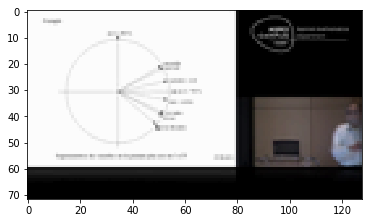

------------------------------ 
Slide n°  35
Première image :
https://youtu.be/uV5hmpzmWsU?t=516s


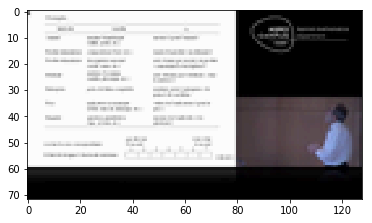

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :3)


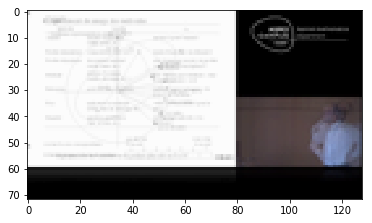

------------------------------ 
Slide n°  36
Première image :
https://youtu.be/uV5hmpzmWsU?t=3606s


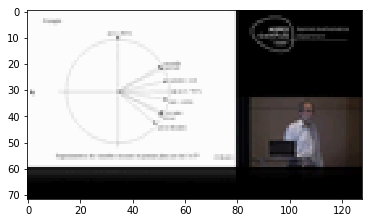

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :46)


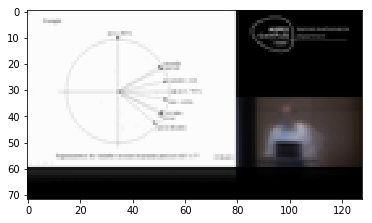

------------------------------ 
Slide n°  37
Première image :
https://youtu.be/uV5hmpzmWsU?t=3639s


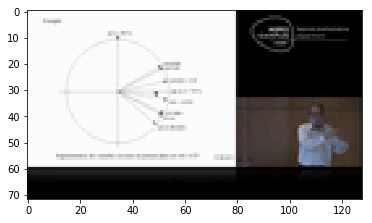

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :15)


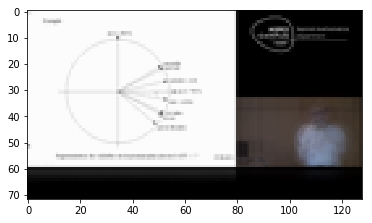

------------------------------ 
Slide n°  38
Première image :
https://youtu.be/uV5hmpzmWsU?t=3609s


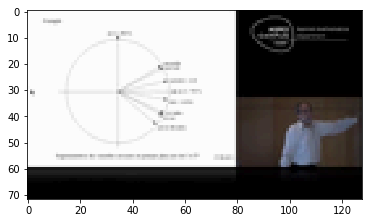

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :109)


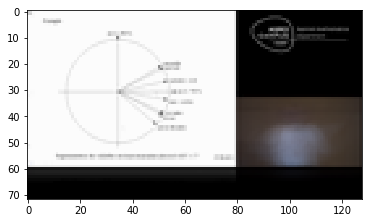

------------------------------ 
Slide n°  39
Première image :
https://youtu.be/uV5hmpzmWsU?t=0s


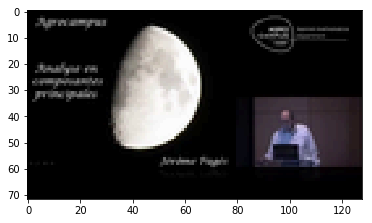

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :10)


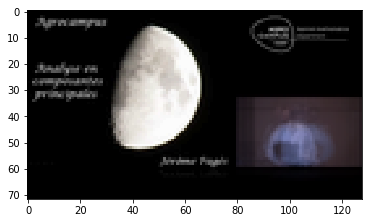

------------------------------ 
Slide n°  40
Première image :
https://youtu.be/uV5hmpzmWsU?t=5793s


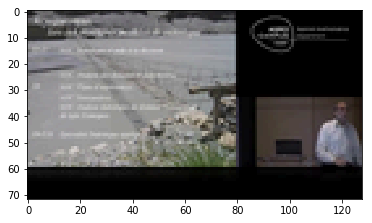

Image moyenne de tout le cluster
(Nombre d'images dans le cluster :3)


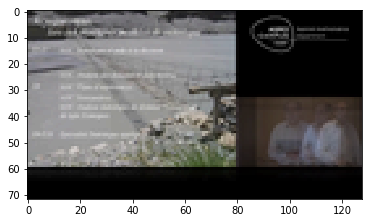

In [14]:
for g in range(max(final_clusters)):
    g = g + 1
    print('-'*30,"\nSlide n° ", g)
    km_centers = np.where(final_clusters == g)[0] # renvoie les indexes des centres issus du kmeans qui ont été groupés dans le groupe g après la classification hiérarchique
    img_ind = np.where([c in km_centers for c in clusters_kmeans]) # renvoie les indexes des images similaires, groupées par kmeans puis par classification hiérarchique
    same_slide = video.iloc[img_ind] # renvoie toutes les images montrant une même slide
    first_image = same_slide.sort_values("position").iloc[0]
    
    print("Première image :")
    display_image(video, first_image["position"])
    
    print("Image moyenne de tout le cluster")
    print("(Nombre d'images dans le cluster :{})".format(len(same_slide)))

    average_image = same_slide.iloc[:,1:].mean()   
    display_with_pylab(np.array(average_image))